# Homework 5: SQL

# Aliza Rafique

# ar05986@st.habib.edu.pk

## Part 2

### Using the efficient way

In [2]:
import psycopg2
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [3]:
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="1234")

In [4]:
df2 = psql.read_sql('SELECT * FROM employeeattrition1', conn)

C:\Users\Sameer\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
df2.head()

,employeenumber,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df2.keys()

Index(['employeenumber', 'age', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

# Analysis 1

<AxesSubplot:title={'center':'Job Roles'}>

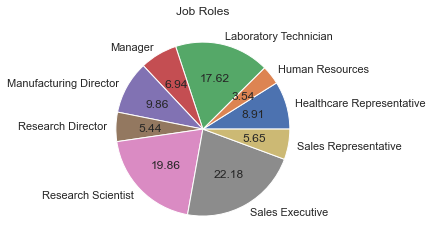

In [7]:
df2.groupby('jobrole').size().plot(kind='pie', autopct='%.2f', title='Job Roles', ylabel='')

### Explanation
In this pie chart, we can see that most of the people employed are Sales Executive then Research Scientist. The insight we can get from this is that the employee data of the company provided to us is of a research-based organization as the major chunks of the people are scientists or laboratory technicians. With sales team being more in number as well we can assume that this is a non-profit organization and they produce and market their products. 

# Analysis 2

<AxesSubplot:title={'center':'Number of People in Education Fields'}, ylabel='educationfield'>

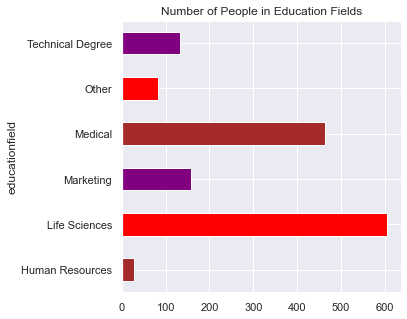

In [13]:
df2.groupby('educationfield').size().plot(kind='barh', 
                                          title='Number of People in Education Fields', color=['brown', 'red', 'purple'], figsize=((5, 5)))

### Explanation
From this bar graph, we can see that most of the people employed are from the fields of Life Sciences that again endorses the observation made in the previous analysis that this data might be of a research institute. One more interesting insight we can get is that even though the task force for sales executive has the highest proportion, the employees with a marketing background are fewer than medical and life sciences. The possible reason for this can be that people with a sciences or medical or technical background have joined the sales teams.

# Analysis 3

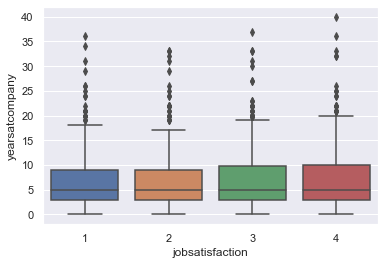

In [56]:
ax = sns.boxplot(x="jobsatisfaction", y="yearsatcompany", data=df2)

### Explanation
This boxplots shows that with a point 4 job satisfaction rating, the years at company spent by the employees is the greatest. Which indicates that even though with changing markets and job roles, the employees satisfied with their jobs are more likely to stay in the company even for 40 years. However, there is a discrepancy in the boxplot values for job satisfaction point 1 and 2. This can mean that although employee rated a low job satisfaction if they are still staying at the company it can mean that all the factors such as salary, enviornment satisfaction have not been met but certain factors have satisfied the employees so he has not left the job but is also not happy with the current state.

# Analysis 4

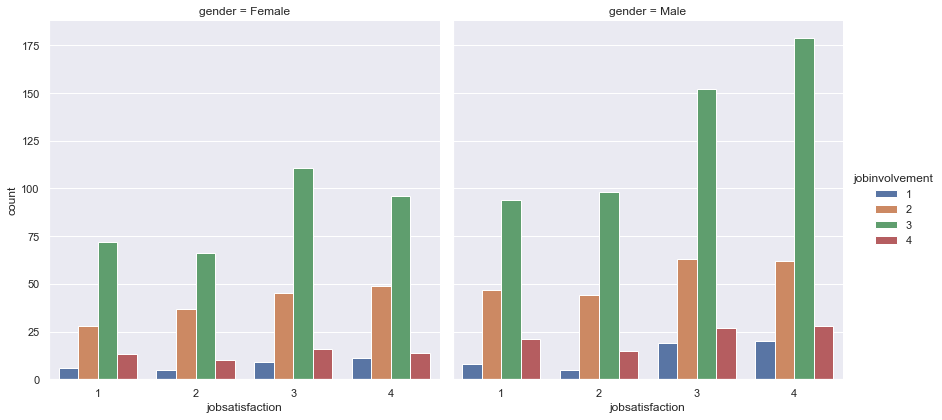

In [64]:
sns.catplot(x="jobsatisfaction", hue="jobinvolvement", col="gender",
                data=df2, kind="count",
                height=6, aspect=1)

### Explanation
From this graph we can compare the job satisfaction and job involvement of both genders in the company. We can notice that the overall job satisfaction is higher in males as compared to females. Most of the male employees have marked a point 4 job satisfaction in contrast to fewer females marking a point 4 job satisfaction. Moreover, for both groups, most people rated a point 3 job involvement. Male employees overall feel more affiliated with the institute than females and this can also be the reason for them marking a higher satisfaction rating. Now, measures need to be taken to understand why females have a low job invovlement and job satisfaction rating. In the following analysis, we will try to find reasons for which females have rates a fewer job satisfaction rating.

# Analysis 5

<AxesSubplot:xlabel='joblevel', ylabel='dailyrate'>

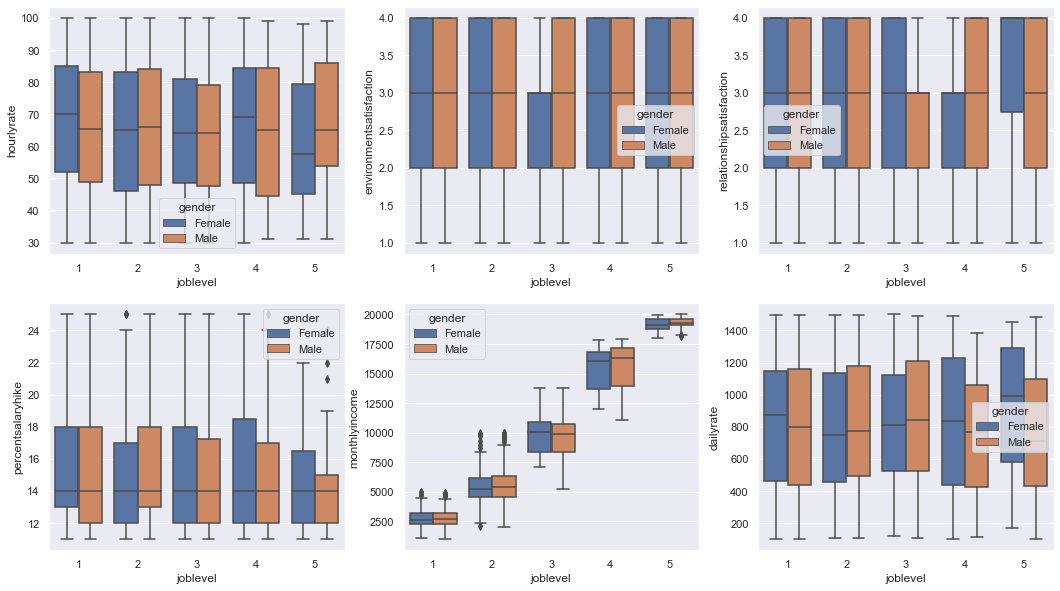

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# Joblevel and hourlyrate
sns.boxplot(ax=axes[0, 0], x='joblevel', y='hourlyrate', data=df2, hue='gender')
# joblevel and environment satisfaction
sns.boxplot(ax=axes[0, 1], x='joblevel', y='environmentsatisfaction', data=df2, hue='gender')
# joblevel and relationship satisfaction
sns.boxplot(ax=axes[0, 2], x='joblevel', y='relationshipsatisfaction', data=df2, hue='gender')
# joblevel and percent salary hike
sns.boxplot(ax=axes[1, 0], x='joblevel', y='percentsalaryhike', data=df2, hue='gender')
# joblevel and years since last promotion
sns.boxplot(ax=axes[1, 1], x='joblevel', y='monthlyincome', data=df2, hue='gender')
# joblevel and work life balance
sns.boxplot(ax=axes[1, 2], x='joblevel', y='dailyrate', data=df2, hue='gender')

### Explanation
Now, let's consider all these relationships to find out the reason for which the job satisfaction of females is less than males. Here we are checking based on the standard job level. In this first graph, the average hourly rate of male and female employees is different in the same job level except at job level 3. But this does not indicate whether the job satisfaction is lower because of hourly rate. Next, for environment satisfaction, all job levels have indicated an average of 3.0 for both males and females. However, in job level 3, the average is very less for females in that job level which means in that females are not satisfied with the procedures and environment at that authorization level. again, this does not exactly account to the reason of overall less job satisfaction. The relationship satisfaction graph also does not provide an insight into lower job satisfaction level. The mean percentage salary hike for females is exactly the same as males in each job level so this is also not a contributing factor. There are fluctuations in mean monthly income but since they are very small, this does not contribute either. Same for the daily rate of males and females, the fluctuations are small enough not to be considered.
All these six relationship did not provide us a clear reason for why more females have a low job satisfaction than males in this company. There might be other internal factors the interpersonal relationship with the departments that should be explored to further understand. 

# Final Analysis

<AxesSubplot:>

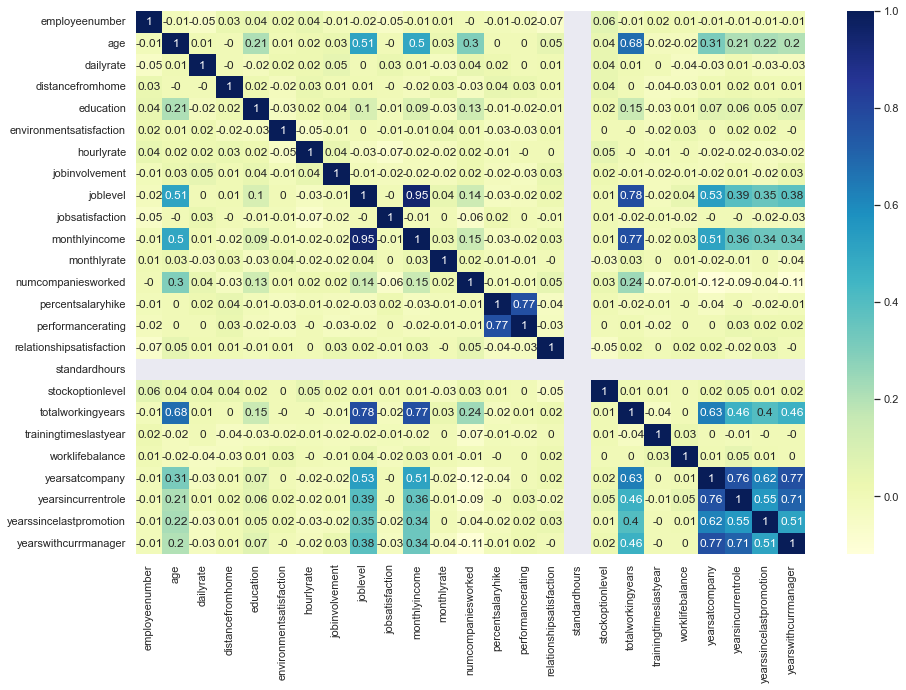

In [66]:
plt.figure(figsize=(15, 10))
sns.heatmap(round(df2.corr(),2), cmap='YlGnBu',annot=True)

### Explanation
There is a lot that we can understand from this correlation plot. We will ignore the employee number as it is just an ID. The strongest relationship that we can see is between monthly income and job level. That is pretty obvious that with an increasing job level (authority), the monthly income is also high. For a lot of other factors we can see no relationships (where 0 is marked). One more interesting insight is of total working years and monthly income with 0.77 correlation value indicating that people staying longer in the company end up getting higher salaries. There is a lot we can figure out for each factor from this correlation plot depending on the hypothesis that we are planning to investigate. 

# End of Assignment